In [8]:
from torch import manual_seed
from functools import partial
from matplotlib.pyplot import plot

from pathlib import Path
from karpathy_series.makemore.data import read_data
from karpathy_series.makemore.models.linear import Linear
from karpathy_series.makemore.models.perceptron import Perceptron
from karpathy_series.makemore.encoding.character import CharacterEncoder, CharacterSet
from karpathy_series.makemore.training.data import TrainingSequencer
from karpathy_series.makemore.training.learning import Learner
from karpathy_series.makemore.models.generation import BiGramNetGenerator
from karpathy_series.makemore.bigrams import BiGram

%matplotlib inline
generator = manual_seed(2147483647)

In [2]:
data_path = Path("../../data/names.txt")
words = read_data(data_path)
char_set = CharacterSet.from_words(words)
char_encoder = CharacterEncoder.from_charset(char_set)
bi_gram_gen = partial(BiGram.generate, ".")
ts_bi = TrainingSequencer(char_encoder, char_encoder, bi_gram_gen)

In [10]:
linear = Linear.init_random_from_size(char_encoder.size, char_encoder.size)
generator = BiGramNetGenerator(char_set, char_encoder, linear)

In [5]:
training_sequence = ts_bi.training_sequence(words, 100, True)

In [20]:
learner = Learner(linear, 10)
losses = learner(training_sequence, epochs=100, report_epochs=10)

Epoch 10 is finished with loss = 2.5350117683410645
Epoch 20 is finished with loss = 2.3646585941314697
Epoch 30 is finished with loss = 2.472399950027466
Epoch 40 is finished with loss = 2.472219944000244
Epoch 50 is finished with loss = 2.4790735244750977
Epoch 60 is finished with loss = 2.381821393966675
Epoch 70 is finished with loss = 2.5062143802642822
Epoch 80 is finished with loss = 2.4249866008758545
Epoch 90 is finished with loss = 2.405606269836426
Epoch 100 is finished with loss = 2.430426597595215


In [23]:
generator()

'khin'

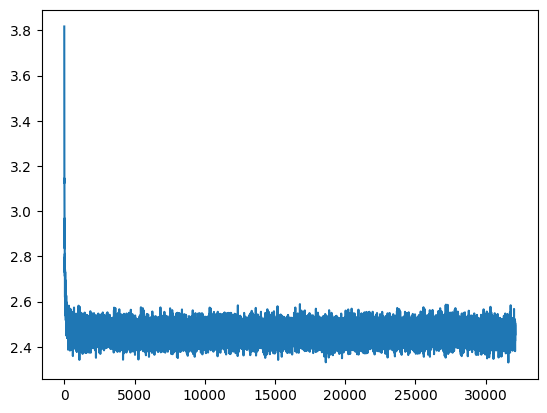

In [24]:
plot(losses)

In [ ]:
multi_layer = Perceptron.init_random_from_size(char_encoder.size, char_encoder.size, [300, 100])
multi_layer_generator = BiGramNetGenerator(char_set, char_encoder, multi_layer)

In [ ]:
m_learner = Learner(multi_layer, 50)
m_learner(training_sequence, epochs=100, report_epochs=20)

In [ ]:
multi_layer_generator()